DeConveil test

In [1]:
import os
import pickle as pkl
import pandas as pd
import numpy as np

In [3]:
from pydeseq2.utils import build_design_matrix
from deconveil.dds import deconveil_fit
from deconveil.inference import Inference
from deconveil.default_inference import DefInference
import deconveil.utils_CNaware
from deconveil import deconveil_fit
from deconveil.ds import deconveil_stats

Loading data 

In [101]:
# Test simulated data
#DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/datasets/"
#counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna_counts.csv"), index_col=0)
#counts_df = counts_df.T
#metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata.csv"), index_col=0)
#cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv.csv"), index_col=0)
#cnv = cnv.T

In [5]:
# Test Pan-cancer data

DATA_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/TCGA/STAD/test"
counts_df = pd.read_csv(os.path.join(DATA_PATH, "rna.csv"), index_col=0)
counts_df = counts_df.T
metadata = pd.read_csv(os.path.join(DATA_PATH, "metadata.csv"), index_col=0)
cnv = pd.read_csv(os.path.join(DATA_PATH, "cnv.csv"), index_col=0)
cnv = cnv.T

Perform Inference and Statistical test

In [7]:
inference = DefInference(n_cpus=8)
dds = deconveil_fit(
    counts=counts_df,
    metadata=metadata,
    cnv=cnv,
    design_factors="condition",
    inference=inference,
    refit_cooks=True
)
dds.fit_size_factors()
dds.fit_genewise_dispersions()
dds.fit_dispersion_trend()
dds.fit_dispersion_prior()
dds.fit_MAP_dispersions()
dds.fit_LFC()

dds.calculate_cooks()
if dds.refit_cooks:
    # Replace outlier counts
    dds.refit()
    
# Statistical analysis
stat_res = deconveil_stats(dds, 
                            alpha=0.05, 
                            independent_filter=True, 
                            cooks_filter=True)
stat_res.run_wald_test()

if stat_res.independent_filter:
    stat_res._independent_filtering()
else:
    stat_res._p_value_adjustment()

stat_res.lfc_shrink(coeff="condition_B_vs_A")
stat_res.summary()

OUTPUT_PATH = "/Users/katsiarynadavydzenka/Documents/PhD_AI/CN-aware-DGE/results/STAD/"
os.makedirs(OUTPUT_PATH, exist_ok=True)  # Create path if it doesn't exist
stat_res.results_df.to_csv(os.path.join(OUTPUT_PATH, "res_CNaware.csv"))

Fitting size factors...
... done in 0.04 seconds.

Fitting dispersions...
... done in 1.80 seconds.

Fitting dispersion trend curve...
... done in 0.28 seconds.

Fitting MAP dispersions...
... done in 2.42 seconds.

Fitting LFCs...
... done in 1.27 seconds.

Calculating cook's distance...
... done in 0.08 seconds.

Replacing 499 outlier genes.

Fitting dispersions...


replace_mask before filtering: (64, 499)
Number of True values in replace_mask: 697
replacement_counts_trimmed shape: (61, 499)


... done in 0.07 seconds.

Fitting MAP dispersions...
... done in 0.10 seconds.

Fitting LFCs...
... done in 0.05 seconds.

Running Wald tests...
... done in 0.56 seconds.

/opt/anaconda3/lib/python3.11/site-packages/pydeseq2/utils.py:1599: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta = np.linalg.lstsq(A, b)[0]
Fitting MAP LFCs...


Log2 fold change & Wald test p-value: condition B vs A
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
A1BG-AS1     29.745399       -0.165771  0.230461 -0.818715  0.412949  0.527916
A2ML1     29319.797526       -0.224643  0.584151 -3.244299  0.001177  0.004301
A4GALT     1271.315666       -0.103942  0.187939 -0.625653  0.531542  0.639031
A4GNT       455.611732       -1.815053  0.665089 -3.485436  0.000491  0.002039
AAAS       2091.957826        0.188806  0.104111  1.904175  0.056887  0.109230
...                ...             ...       ...       ...       ...       ...
ZXDC       1591.210284        0.083674  0.115131  0.772791  0.439646  0.554807
ZYG11A       42.787794       -0.200873  0.393102 -0.738468  0.460230  0.573745
ZYG11B     2510.156872       -0.676494  0.162652 -4.501000  0.000007  0.000051
ZYX       15186.039450       -0.060125  0.181660  0.208921  0.834510  0.883340
ZZEF1      5943.322785       -0.323732  0.167991 -1.809046  0.070444  0.1300

... done in 1.98 seconds.



In [78]:
#stat_res.plot_MA(s=10)

Volcano plot

In [ ]:
from bioinfokit import analys, visuz

In [66]:
stat_res.results_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
A1BG-AS1,29.745399,-0.165771,0.230461,-0.818715,0.412949,0.527916
A2ML1,29319.797526,-0.224643,0.584151,-3.244299,0.001177,0.004301
A4GALT,1271.315666,-0.103942,0.187939,-0.625653,0.531542,0.639031
A4GNT,455.611732,-1.815053,0.665089,-3.485436,0.000491,0.002039
AAAS,2091.957826,0.188806,0.104111,1.904175,0.056887,0.109230
...,...,...,...,...,...,...
ZXDC,1591.210284,0.083674,0.115131,0.772791,0.439646,0.554807
ZYG11A,42.787794,-0.200873,0.393102,-0.738468,0.460230,0.573745
ZYG11B,2510.156872,-0.676494,0.162652,-4.501000,0.000007,0.000051
ZYX,15186.039450,-0.060125,0.181660,0.208921,0.834510,0.883340


In [72]:
stat_res.results_df['padj'] = pd.to_numeric(stat_res.results_df['padj'], errors='coerce').fillna(1)

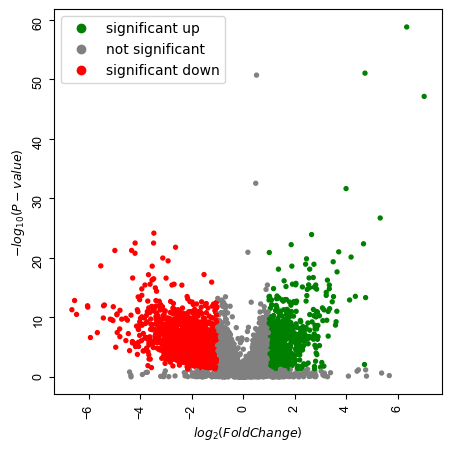

In [80]:
visuz.GeneExpression.volcano(df=stat_res.results_df, lfc='log2FoldChange', pv='padj', show=True, plotlegend=True)